<a href="https://colab.research.google.com/github/SaiKrishna2399/SaiKrishna_INFO5731_Fall2022/blob/main/Sai_Krishna_Sarvadevabhatla_Assignment3_INFO5731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


     ---------------------------------------- 6.5/6.5 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 8.0 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00


In [ ]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link_1 = 'https://www.imdb.com/title/tt0110912/reviews?ref_=tt_urv'
array_title = []
array_review = []
driver.get(link_1)
for num in range(4):
  driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
  time.sleep(5)
  list_Of_Title = driver.find_elements(By.CLASS_NAME, "title")
  list_Of_Reviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(list_Of_Title, list_Of_Reviews):
      array_title.append((ele.text).replace('\n',''))
      array_review.append(sub_ele.text)
data_frame = pd.DataFrame(list(zip(array_title, array_review)), columns =['Title', 'Review'])
print("Data Frame Length is {0}".format(len(data_frame)))
data_frame

Data Frame Length is 125


,Title,Review
0,The masterpiece without a message,"One of the early scenes in ""Pulp Fiction"" feat..."
1,Shotguns,I like the bit with the cheeseburger. It makes...
2,A masterpiece of screenwriting,"This is Tarantino's masterpiece, there's no ot..."
3,The rebirth of a genre – and film history,"I can only speak for myself, but I had never s..."
4,The most rewatchable movie of all time,
...,...,...
120,"Kinetic and sneaky, narcotizing and primal...","Quentin Tarantino co-wrote, directed and co-st..."
121,Brilliant film that is one of the best movies ...,Three Stories told out of order with various c...
122,Still a classic on the big screen,Saw this at the cinema as a rerelease despite ...
123,Is Tarantino Our New Kubrick?,


In [ ]:
import nltk
nltk.download()
#Converting to Lower Case
data_frame['Lower Case'] = data_frame['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
#Removal of Punctuation
data_frame['Removal of Punctuation'] = data_frame['Lower Case'].str.replace('[^\w\s]','')

C:\Users\19408\AppData\Local\Temp\ipykernel_15052\4042395661.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['Removal of Punctuation'] = data_frame['Lower Case'].str.replace('[^\w\s]','')


In [ ]:
#Removal of Special Characters
import re
data_frame['Removal of Special Characters'] = data_frame['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [ ]:
#Removal of Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data_frame['Stopwords Removal'] = data_frame['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [ ]:
#Spelling Correction
from textblob import TextBlob
data_frame['Spelling Correction'] = data_frame['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')
data_frame['Tokenization'] = data_frame['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Stemming
from nltk.stem import PorterStemmer
Stemming = PorterStemmer()
data_frame['After Stemming'] = data_frame['Tokenization'].apply(lambda x: " ".join([Stemming.stem(word) for word in x]))

In [ ]:
#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
data_frame['After Lemmatization'] = data_frame['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data_frame.to_csv('reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#1.1 - Trigrams
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
words_sentence = []
for sentence in data_frame['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
after_cleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(after_cleaning))

In [ ]:
trigrams_1 = nltk.trigrams(iterations)
frequency_dist_1 = nltk.FreqDist(trigrams_1)
frequency_dist_1

FreqDist({('samuel', 'l', 'jackson'): 35, ('john', 'travolta', 'samuel'): 14, ('travolta', 'samuel', 'l'): 12, ('pulp', 'fiction', 'one'): 7, ('jackson', 'john', 'travolta'): 6, ('well', 'pulp', 'fiction'): 5, ('l', 'jackson', 'john'): 5, ('watch', 'pulp', 'fiction'): 5, ('one', 'best', 'move'): 5, ('two', 'hit', 'men'): 5, ...})

In [ ]:
#1.2 - Probability of Bi grams
from collections import Counter
bigrams_1 = nltk.bigrams(iterations)
frequency_dist_1 = nltk.FreqDist(bigrams_1)
bigrams_dict_1 = dict(frequency_dist_1)
for word in bigrams_dict_1:
  print( str(word) + ':' + str(bigrams_dict_1[word] / iterations.count(word[0])))

('one', 'earli'):0.007194244604316547
('earli', 'scene'):0.2
('scene', 'pulp'):0.023255813953488372
('pulp', 'fiction'):0.9285714285714286
('fiction', 'featur'):0.01904761904761905
('featur', 'two'):0.1111111111111111
('two', 'hidden'):0.07142857142857142
('hidden', 'discus'):0.1111111111111111
('discus', 'big'):0.2222222222222222
('big', 'mac'):0.2
('mac', 'call'):0.3333333333333333
('call', 'countri'):0.08333333333333333
('countri', 'dialogu'):0.5
('dialogu', 'witti'):0.029411764705882353
('witti', 'entertain'):0.125
('entertain', 'also'):0.045454545454545456
('also', 'discard'):0.019230769230769232
('discard', 'make'):1.0
('make', 'two'):0.015873015873015872
('two', 'thu'):0.03571428571428571
('thu', 'seem'):0.16666666666666666
('seem', 'normal'):0.04
('normal', 'didn'):0.2
('didn', 'know'):0.05
('know', 'better'):0.03571428571428571
('better', 'might'):0.043478260869565216
('might', 'assum'):0.25
('assum', 'regular'):0.5
('regular', 'gun'):0.5
('gun', 'chitchat'):0.1111111111111111

In [ ]:
#1.3 Noun Phrases and relative probabilities of each review in terms of other reviews
datset = ''
index_1 = []
i = 1
for line in data_frame['After Lemmatization']:
  datset = datset + line
  value = 'Review-' + str(i)
  index_1.append(value)
  i = i + 1

In [ ]:
from textblob import TextBlob
noun_phrases = []
frequency_1 = []
for line in data_frame['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in data_frame['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / datset.count(word))
  frequency_1.append(noun_phrases_freq)
noun_phrases_datframe = pd.DataFrame(frequency_1).T
noun_phrases_datframe.columns = list(noun_phrases)
noun_phrases_datframe.index = index_1
noun_phrases_datframe

,earli scene pulp fiction featur,big mac,countri dialogu witti,normal didn,regular gun chitchat way work,comic payoff end scene use part convers taunt victim talk relev anyth film anyth el matter,scene pulp fiction wouldn pulp fiction,sen tarutino,film whatev,final product coher wonder textur wonder fan,...,brilliant sophomor effort,proper note,main categori,direct score cinematographi act cast plot,film everyon need,certain sen humor,plotlin truli,prerequisit requir view film top tier,time extrem,construct piec filmmak worthi view
Review-1,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import math
def idf_tf_value(sentence,word):
  size = len(sentence.split(" "))
  value_tf = sentence.count(word)/size
  value_idf = 0
  if(value_tf!=0):
    value_idf = math.log(size)/sentence.count(word)
  else:
    return 0;
  return value_tf*value_idf

sentences = data_frame["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
idf_tf = pd.DataFrame(tokens_list,columns=["token"])
counter = 0
for i in sentences:
  idf_tf[str(counter)] = idf_tf["token"].apply(lambda x : idf_tf_value(i,x))
  counter+=1

idf_tf

C:\Users\19408\AppData\Local\Temp\ipykernel_15052\968956903.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  idf_tf[str(counter)] = idf_tf["token"].apply(lambda x : idf_tf_value(i,x))
C:\Users\19408\AppData\Local\Temp\ipykernel_15052\968956903.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  idf_tf[str(counter)] = idf_tf["token"].apply(lambda x : idf_tf_value(i,x))
C:\Users\19408\AppData\Local\Temp\ipykernel_15052\968956903.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.012885,0.25993,0.050434,0.026708,0.0,0.180537,0.036122,0.0,0.07824,...,0.244136,0.0,0.298627,0.065764,0.07824,0.046052,0.022232,0.110774,0.0,0.050879
1,b,0.012885,0.25993,0.050434,0.026708,0.0,0.180537,0.036122,0.0,0.07824,...,0.000000,0.0,0.000000,0.065764,0.07824,0.046052,0.022232,0.110774,0.0,0.050879
2,leatherstudded,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3,stick,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
4,international,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,points,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3344,limbs,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3345,potentially,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
3346,threatens,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
sentence = 'There is a nice moral progression to the stories. We presume that Vincent hesitates to sleep with Mia out of fear rather than loyalty. Later, Butchs act of heroism could be motivated by honor, but were never sure. The film ends, however, with Jules making a clear moral choice. Thus, the movie seems to be exploring whether violent outlaws can act other than for self-preservation.'
X_list = word_tokenize(sentence)
stop_words = stopwords.words('english') 
X_set = {w for w in X_list if not w in stop_words}    

In [ ]:
def compute_vector(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list_1 =[]
  list_2 =[]
  for w in r_vector: 
      if w in X_set: list_1.append(1)
      else: list_1.append(0) 
      if w in Y_set: list_2.append(1) 
      else: list_2.append(0)
  return r_vector, list_1, list_2

In [ ]:
def compute_cosine(r_vector, list_1, list_2):
  counter = 0
  for i in range(len(r_vector)): 
        counter+= list_1[i]*list_2[i] 
  cosine = counter / float((sum(list_1)*sum(list_2))**0.5) 
  return cosine

In [ ]:
list_3 = []
for sentence in data_frame['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in stop_words}
  r_vector, list_1, list_2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(r_vector, list_1, list_2)
  except ZeroDivisionError:
    similarity = 'None'
  list_3.append(similarity)
cosine_df = pd.DataFrame(list(zip(data_frame['Review'],list_3)), columns=['Reviews','Cosine Similarity'])
cosine_df

,Reviews,Cosine Similarity
0,"One of the early scenes in ""Pulp Fiction"" feat...",0.22475
1,I like the bit with the cheeseburger. It makes...,0.0
2,"This is Tarantino's masterpiece, there's no ot...",0.018279
3,"I can only speak for myself, but I had never s...",0.024465
4,,None
...,...,...
120,"Quentin Tarantino co-wrote, directed and co-st...",0.048324
121,Three Stories told out of order with various c...,0.045805
122,Saw this at the cinema as a rerelease despite ...,0.029514
123,,None


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here

from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model_1 = Word2Vec.load('model.bin')
print(new_model_1)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.8038654e-03 -2.3272610e-03 -1.4243148e-03 -4.7192373e-04
 -3.3798483e-03 -4.8786891e-03  4.9780081e-03 -3.7425950e-03
  2.4260832e-03  1.0155034e-03 -1.6745590e-03  6.0277362e-05
 -4.0388550e-03  2.5002684e-03 -2.7058243e-03  1.3199939e-05
  3.0755545e-03 -4.5101121e-03 -1.7779284e-03  2.7346415e-03
 -4.4539841e-03 -2.1079485e-03  2.9861161e-03  1.4317539e-03
  2.0538298e-03 -2.5377532e-03  3.3643765e-03  2.0378341e-03
  1.2169158e-03 -1.6937236e-03 -3.3966617e-03 -4.5708190e-03
  4.2993152e-03  1.1097190e-03  1.7265123e-03  3.2675953e-03
  3.0986133e-03 -1.1882273e-03  4.3654009e-03  3.5327475e-03
 -1.9432913e-03 -2.7498417e-03  4.4329572e-03 -4.8360424e-03
  4.9943551e-03 -2.5520186e-04  3.0398753e-03  3.2035108e-03
  1.7994202e-03 -3.0071789e-03 -4.3562325e-03 -4.2067175e-03
  3.4143683e-03 -3.9233682e-03 -1.0835931e-0

C:\Users\19408\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\19408\AppData\Local\Temp\ipykernel_15052\2342956917.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


C:\Users\19408\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\19408\AppData\Local\Temp\ipykernel_15052\3592684789.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


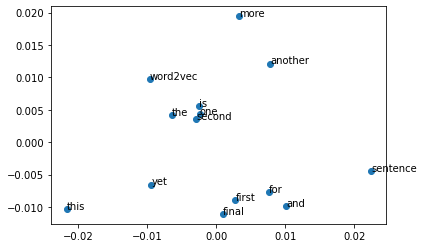

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca_var = PCA(n_components=2)
result_var = pca_var.fit_transform(X)
pyplot.scatter(result_var[:, 0], result_var[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result_var[i, 0], result_var[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [1]:
# The GitHub link of your final csv file



# Link: 


print("Github Link:\n","https://github.com/SaiKrishna2399/SaiKrishna_INFO5731_Fall2022/blob/main/sentiment_analysis_reviews.csv")


Github Link:
 https://github.com/SaiKrishna2399/SaiKrishna_INFO5731_Fall2022/blob/main/sentiment_analysis_reviews.csv
